<h4>Covid Sentiment Analysis using vaderSentiment</h4>
<h5>Objective</h5>

<p>Identify the public's standpoint regarding the Covid-19 situation, by applying a sentiment analysis on the dataset.
    
<hr>
By using tweets que can make sure that the public's opinion is not influenced by external media or resources that may affect the results of the analysis.
Tweets are from late decemeber 2020.
<hr>


Importing common libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Exploring the data

In [2]:
# loading dataset
df = pd.read_csv('tweets-covid.csv')

In [3]:
# reviewing first rows
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Kat 💚🖤 Black lives still matter.,"Indianapolis, IN","She/her. Proud mama, clinical research nurse, ...",25-05-16 20:36,6033,1418,61470,False,26-12-20 22:40,So I had one last dissolvable suture knot in m...,['COVIDvaccine'],Twitter for iPhone,False
1,Thomas Curran,Behind you..... ☺,Proud member of Jackie's Army.\n\nThese though...,26-06-12 18:43,871,1336,8858,False,26-12-20 22:36,Reason for the delay in #CovidVaccine rollout ...,['CovidVaccine'],Twitter for Android,False
2,ACCESS POINT HEALTH - POINT D'ACCÈS SANTÉ,Fredericton,Bilingual Secure Virtual Care for all of New B...,22-10-20 0:24,12,49,50,False,26-12-20 22:35,Info sur le 💉 mRNA/ARNm https://t.co/Xhftr53vC...,"['mRNA', 'covid', 'covidvaccine', 'nursepracti...",Twitter Web App,False
3,Tim Walker,London,A point of view mandrake@theneweuropean.co.uk,27-07-09 14:07,83877,998,14409,True,26-12-20 22:35,Sunday Mirror right to highlight this: I’m hea...,NaN,Twitter for iPhone,False
4,Judy Guzman-Cottrill,"Portland, OR",Pediatric Infectious disease physician with on...,28-04-09 20:05,1643,1467,7620,False,26-12-20 22:35,Guess which HCP got her #CovidVaccine today? T...,"['CovidVaccine', 'NotThrowingAwayMyShot', 'Bes...",Twitter for iPhone,False


In [4]:
# Exploring columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [5]:
# dataframe entries (rows)
len(df)

6630

Identifying Null Values

In [6]:
#Find All Null Values in dataset 
print("Total null values:", df.isna().sum().sum())

#Precent of null values in our dataset
print("Percentage of null values:", round(df.isna().sum().sum()*100/len(df),2),"%")

Total null values: 4123
Percentage of null values: 62.19 %


In [7]:
#Find Null Values in dataset by Column
df.isna().sum()

user_name              0
user_location       1513
user_description     475
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2134
source                 1
is_retweet             0
dtype: int64

Now that we have identified the null values, we must decide the relevance of this data. This will help us to determine if we should drop it or not.

Distribution of null values by column:
user_location, user_description, hashtags and source.
This makes sense because not everyone shares their location, device, have a user description or uses hashtags when tweeting.

In [8]:
# Exploring the location column
#Create a new dataframe with only the users that have a specific location
df_location = df[df.user_location.notnull()]

#Verify that the filter works results
df_location.isna().sum()

user_name              0
user_location          0
user_description     165
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1617
source                 1
is_retweet             0
dtype: int64

In [9]:
df_location.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Kat 💚🖤 Black lives still matter.,"Indianapolis, IN","She/her. Proud mama, clinical research nurse, ...",25-05-16 20:36,6033,1418,61470,False,26-12-20 22:40,So I had one last dissolvable suture knot in m...,['COVIDvaccine'],Twitter for iPhone,False
1,Thomas Curran,Behind you..... ☺,Proud member of Jackie's Army.\n\nThese though...,26-06-12 18:43,871,1336,8858,False,26-12-20 22:36,Reason for the delay in #CovidVaccine rollout ...,['CovidVaccine'],Twitter for Android,False
2,ACCESS POINT HEALTH - POINT D'ACCÈS SANTÉ,Fredericton,Bilingual Secure Virtual Care for all of New B...,22-10-20 0:24,12,49,50,False,26-12-20 22:35,Info sur le 💉 mRNA/ARNm https://t.co/Xhftr53vC...,"['mRNA', 'covid', 'covidvaccine', 'nursepracti...",Twitter Web App,False
3,Tim Walker,London,A point of view mandrake@theneweuropean.co.uk,27-07-09 14:07,83877,998,14409,True,26-12-20 22:35,Sunday Mirror right to highlight this: I’m hea...,NaN,Twitter for iPhone,False
4,Judy Guzman-Cottrill,"Portland, OR",Pediatric Infectious disease physician with on...,28-04-09 20:05,1643,1467,7620,False,26-12-20 22:35,Guess which HCP got her #CovidVaccine today? T...,"['CovidVaccine', 'NotThrowingAwayMyShot', 'Bes...",Twitter for iPhone,False


In [10]:
"""
Get unique locations names
Gruop then by names and count how many they are

"""

count_location = df_location.loc[df_location["user_location"].str.contains(","), "user_location" ].value_counts()

number_count =  count_location
names_count = count_location.index

for i in range(len(count_location)):
    print(names_count[i],"->",number_count[i])

London, England -> 91
New York, NY -> 49
Los Angeles, CA -> 46
Philadelphia, PA -> 43
London, UK -> 36
Chicago, IL -> 36
Washington, DC -> 34
Houston, TX -> 33
Toronto, Ontario -> 33
Boston, MA -> 32
New Delhi, India -> 31
Texas, USA -> 29
England, United Kingdom -> 28
Cincinnati, OH -> 26
California, USA -> 23
Johannesburg, South Africa -> 22
San Francisco, CA -> 22
Pretoria, South Africa -> 22
Atlanta, GA -> 21
Florida, USA -> 21
Mumbai, India -> 20
New York, USA -> 20
Ontario, Canada -> 20
Nashville, TN -> 18
Dublin City, Ireland -> 18
Austin, TX -> 17
Dallas, TX -> 17
Columbus, OH -> 16
Oregon, USA -> 15
Cleveland, OH -> 15
Miami, FL -> 14
Milwaukee, WI -> 14
New Jersey, USA -> 14
Ohio, USA -> 14
Pennsylvania, USA -> 14
Baltimore, MD -> 14
Pittsburgh, PA -> 14
San Antonio, TX -> 13
GP Partner, Watford  -> 13
Seattle, WA -> 13
North Carolina, USA -> 13
Portland, OR -> 12
Delaware, USA -> 12
Minneapolis, MN -> 11
Cape Town, South Africa -> 11
Durham, NC -> 11
Maryland, USA -> 11
Salt

Tampa, Florida -> 1
Gallup, NM -> 1
Midland, MI -> 1
Santee, CA -> 1
Aberdeen, Scotland -> 1
Greenock, Scotland -> 1
Ile-de-France, France -> 1
Film City, Noida -> 1
Kildare, Kerry, Ireland -> 1
Athens, GA -> 1
Taunton, Somerset UK -> 1
NYC, MIAMI, LONDON,PARIS,DUBAI -> 1
Santa Fe, New Mexico, USA -> 1
Lucknow, India -> 1
Lagos, Nigeria -> 1
Kerala, India -> 1
Los Angles, CA/Nashville, TN -> 1
Randburg, South Africa -> 1
Lexington, KY. -> 1
Augusta, GA -> 1
Fort Myers, Fla. -> 1
Grosse Pointe Woods, MI -> 1
wilmington, nc -> 1
West Trenton, NJ -> 1
Covington, GA -> 1
San Juan, PR -> 1
Shelton, WA -> 1
March, England -> 1
40.66636,-73.758066 -> 1
San Diego, CA USA 🇺🇸 -> 1
Richmond, London -> 1
Mesa, Arizona -> 1
Nairobi, kenya -> 1
QuaiBæcʞ, Beausse, BosVille -> 1
Santa Rosa, CA -> 1
Dallas, TX, USA -> 1
Columbia, MD -> 1
Montréal, Québec -> 1
Fife, Scotland -> 1
Waterloo, IA -> 1
Before: Lancaster, PA now Ellicott City MD -> 1
Divided, America -> 1
Hove, England -> 1
Monroe, GA -> 1
Bu

Utah, USA -> 1
Pittsburgh, PA, USA -> 1
Zimbane Mthatha,South Africa -> 1
Harlan, KY -> 1
Melbourne, Aust -> 1
St Petersburg, FL -> 1
Outside Philly, USA -> 1
Feltham, Middlesex  -> 1
Toronto, South of 7 -> 1
City so nice, named it twice! -> 1
Bradford, England -> 1
Ammanford, Wales -> 1
Toronto, Ontario, Canada 🇨🇦  -> 1
Kenmore, New York -> 1
Colonie, NY -> 1
Berkeley, CA -> 1
Holmdel, NJ -> 1
Marblehead, MA -> 1
Bromsgrove, Worcestershire -> 1
Roscommon, Ireland -> 1
Almost Heaven, WV -> 1
Bridgeton, NJ -> 1
The V✌Bay Area, California -> 1
Lincoln, IL -> 1
Arizona, USA -> 1
Derry, Ireland. -> 1
Portsmouth, OH -> 1
Kent, England -> 1
Kirksville, Mo./Ottumwa, Ia. -> 1
Nashville,TN -> 1
San Marcos, TX -> 1
Dhaka,Bangladesh -> 1
Edinburgh, Scotland -> 1
Murica,USA -> 1
Boston, England -> 1
Greenwich, London -> 1
London, England | Dubai, UAE -> 1
Jaipur, India -> 1
Madison, CT -> 1
Hamilton, Ontario  -> 1
Melbourne, VIC -> 1
Bethesda, MD, USA -> 1
Salina, KS -> 1
Huddersfield, England -> 

With the information above we can conclude that the user are located worldwide.
This means that there is no location bias. Which is good since we want the public's opinion from around the world.
We identified that the locations format is not standardized. 

In [11]:
#Percentage of user that have specific locaiton in our dataset

print( "Percentage of user that have location ->", round(len(df_location.user_location.unique())*100/len(df),2) , "%")

Percentage of user that have location -> 33.54 %


Only 33.54% of user have location. So we won't use this column for our analysis.

Exploring sources (user devices)

In [12]:
#Get a raw viwes about the used devices
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'SEMrush Social Media Tool', 'Twitter for iPad', 'TweetDeck',
       'CoSchedule', 'LinkedIn', 'Hootsuite Inc.', 'Instagram', 'HubSpot',
       'Salesforce - Social Studio', 'Sprout Social', 'Paper.li',
       'Buffer', 'IFTTT', 'Khoros Marketing', 'Daily Voice Sync',
       'SPTK: DVBergen', 'Sendible', 'Twitter Media Studio',
       'Falcon Social Media Management ', 'dlvr.it', 'Dynamic Signal',
       'Missinglettr', 'Sprinklr Publisher',
       'Twitter Media Studio - LiveCut', 'Sprinklr',
       'Hocalwire Social Share', 'ThreadReaderApp', 'The Tweeted Times',
       'National Herald', 'Etsy', 'SmarterQueue', 'Orlo',
       'SmartNews | スマートニュース', 'WordPress.com', 'Fanbooster by Traject',
       'Video App Dream Big', 'Sprinklr Publishing', 'Twitter for Mac',
       'ContentCal Studio', 'RSS Masher - Dev', 'AgoraPulse Manager',
       'Tweetbot for iΟS', 'robly_marketing', 'LaterMedia',
       'Twitterri

In [13]:
# Top 5 user devices
df['source'].value_counts().head(5)

Twitter for iPhone     2750
Twitter Web App        1718
Twitter for Android    1523
Twitter for iPad        194
Hootsuite Inc.          105
Name: source, dtype: int64

Although this is nice to have information is not really relevant for our analysis.

<h3>Data Cleaning</h3>

For this analysis we will only be using 2 columns, text and hashtags.

We will create 2 functions that will remove hashtags and links from the tweet's text.

<i>We don't need to take care of emojis, since vader can handle these.</i>

In [14]:
# reviewing columns content
print(df.loc[3,"text"])
print(df.loc[3,"hashtags"])

Sunday Mirror right to highlight this: I’m hearing again and again of chaos on the ground with the way the… https://t.co/mtGG0AGzeJ
nan


In [15]:
def remove_hashtags_links(tags,text):
    
    string  =  text.split()
    temporal = text.split()
    
    
    #Remove links
    for word in string:
        if "http" in word or "@" in word:
            temporal.remove(word)
        
    text = " ".join(temporal)
    
    #Remove Tags
    text = text.replace("#","")
    
    
    return text.strip()

In [16]:
#Apply the function to all data inside the column text
for i in range(len(df['text'])):
    tags =  df.loc[i,'hashtags']
    text =  df.loc[i,'text']
    df.loc[i,"text"] = remove_hashtags_links(tags,text)

In [17]:
df[['text','hashtags']]

,text,hashtags
0,So I had one last dissolvable suture knot in m...,['COVIDvaccine']
1,Reason for the delay in CovidVaccine rollout r...,['CovidVaccine']
2,Info sur le 💉 mRNA/ARNm via mRNA covid covidva...,"['mRNA', 'covid', 'covidvaccine', 'nursepracti..."
3,Sunday Mirror right to highlight this: I’m hea...,NaN
4,Guess which HCP got her CovidVaccine today? TH...,"['CovidVaccine', 'NotThrowingAwayMyShot', 'Bes..."
...,...,...
6625,How China CDC head Dr. George Gao comment Covi...,['CovidVaccine']
6626,Why doesn’t Santa Rosa Department of Health ha...,NaN
6627,What a good news to wake up to today😊. oxfordv...,"['oxfordvaccine', 'oxfordastrazeneca', 'CovidV..."
6628,And very kind of to follow me. (My only claim ...,NaN


We have successfully removed links and hashtags!

<h4>Empty Values!</h4>

Since we want to analyze the sentiment of the text, let's make sure this column is not empty.

In [18]:
#checking for empty text
df[df.text == ''].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
34,SolliVac,NaN,Information and real time updates about the de...,16-11-20 9:50,238,29,178,False,26-12-20 21:45,,NaN,Twitter for iPhone,False
364,Drone Sherpao Basti,"PS103, NA244, Khi, Pakistan",Advocacy 2 cleanse #landmafia & #anp / #taliba...,22-08-20 15:02,8,143,25,False,26-12-20 16:42,,NaN,Twitter Web App,False
1091,Chang Na MD MPH,NaN,"@PermanenteDocs, health policy enthusiast, wel...",12-12-16 6:25,2329,1526,38978,False,31-12-20 23:35,,NaN,Twitter for iPhone,False
1139,Simon Hodes ⬅️2m➡️ 😷,"GP Partner, Watford",#Chronoptimist • NHS GP • LMC Rep •Trainer • A...,28-07-14 13:32,2058,2480,20605,False,31-12-20 22:39,,NaN,Twitter for Android,False
1148,Simon Hodes ⬅️2m➡️ 😷,"GP Partner, Watford",#Chronoptimist • NHS GP • LMC Rep •Trainer • A...,28-07-14 13:32,2058,2480,20605,False,31-12-20 22:26,,NaN,Twitter for Android,False


We can see we have some empty text. Let's find out the amount and get rid of it

In [19]:
print(len(df[df.text == '']))

24


In [20]:
df.isna().sum()

user_name              0
user_location       1513
user_description     475
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2134
source                 1
is_retweet             0
dtype: int64

Since there are only 24 entries, let's drop them

In [21]:
#Drop rows that are empty
df.drop(df[df.text == ''].index, inplace=True)
df.reset_index(inplace=True)

In [22]:
print(len(df[df.text == '']))

0


<h3>Data Processing</h3>

<h4>Sentiment Analysis with VaderSentiment</h4>
<a  href='https://pypi.org/project/vaderSentiment/'>Read more about Vader</a>

We'll be using vader because is specifically attuned to sentiments expressed in social media.



In [23]:
#Load VADER object
analyser = SentimentIntensityAnalyzer()

Let's take a look at how vader works

In [24]:
print("This food is really good :) ->", analyser.polarity_scores("This food is really good :)") )
print("This food is really bad :( ->",analyser.polarity_scores("This food is really bad :(") )

This food is really good :) -> {'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.7559}
This food is really bad :( -> {'neg': 0.635, 'neu': 0.365, 'pos': 0.0, 'compound': -0.7889}


A shown the positive, negative and neutral scores represent the proportion of text that falls in these categories.

We will we using the polarity_scores() method in order to evaluate the sentiment of the tweets.

With this information, we'll create 2 new columns in the dataframe on e that shows the score and the sentiment.

In [25]:
#deciding threshold
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    
    if score['neu'] > score['pos'] and score['neu'] > score['neg']:
        return [score['neu'],"neutral"]
    
    elif score['pos'] >= score['neu'] and score['pos'] > score['neg']:
        return [score['pos'],"positive"]
    
    elif score['neg'] >= score['neu'] and score['neg'] > score['pos']:
        return [score['neg'], "negative"]


#  Create new columns score and sentiment
df['score'] = None
df['sentiment'] = None

list_scores,list_sentiment,data = [],[],[]


#Assign the respective score value to our new columns
for i in range( len(df['text']) ):
    text =  df.loc[i,'text']
    data = sentiment_analyzer_scores(text)
    list_scores.append(data[0])
    list_sentiment.append(data[1])

df['score'] = list_scores
df['sentiment'] = list_sentiment


In [26]:
df[['text','hashtags', 'score','sentiment']]

,text,hashtags,score,sentiment
0,So I had one last dissolvable suture knot in m...,['COVIDvaccine'],1.000,neutral
1,Reason for the delay in CovidVaccine rollout r...,['CovidVaccine'],0.887,neutral
2,Info sur le 💉 mRNA/ARNm via mRNA covid covidva...,"['mRNA', 'covid', 'covidvaccine', 'nursepracti...",1.000,neutral
3,Sunday Mirror right to highlight this: I’m hea...,NaN,0.747,neutral
4,Guess which HCP got her CovidVaccine today? TH...,"['CovidVaccine', 'NotThrowingAwayMyShot', 'Bes...",1.000,neutral
...,...,...,...,...
6601,How China CDC head Dr. George Gao comment Covi...,['CovidVaccine'],1.000,neutral
6602,Why doesn’t Santa Rosa Department of Health ha...,NaN,1.000,neutral
6603,What a good news to wake up to today😊. oxfordv...,"['oxfordvaccine', 'oxfordastrazeneca', 'CovidV...",0.628,neutral
6604,And very kind of to follow me. (My only claim ...,NaN,0.805,neutral


<h3>Data Visualization</h3>

In [27]:
df.sentiment.value_counts()

neutral     6485
positive      99
negative      22
Name: sentiment, dtype: int64

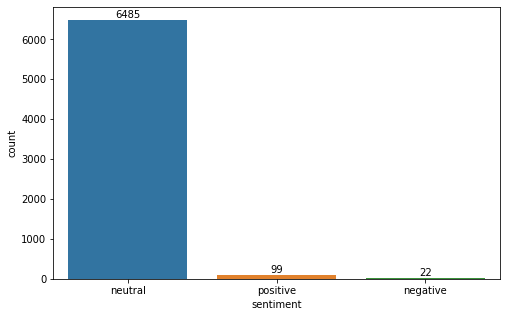

In [28]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment',data=df)

for p in ax.patches:
    ax.annotate(   p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points'
                )

plt.show()

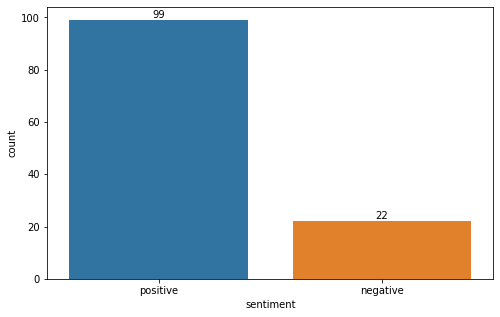

In [29]:
df_sentiment = df[df['sentiment']!='neutral']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment',data=df_sentiment)

for p in ax.patches:
    ax.annotate(   p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points'
                )    
plt.show()

We can that the neutral scores outnumber the positive and negatives tweets. <i>We will try to adjust this later on</i>

We can see that there are more positive tweets than negatives.<br>
Let's visualize the most frequent words by using a Word Cloud

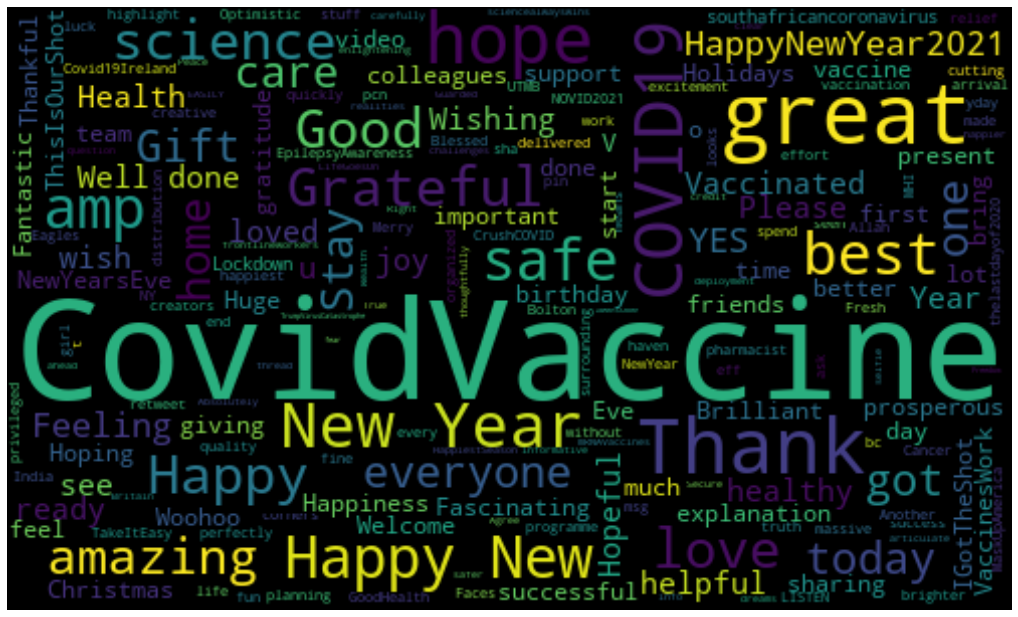

In [30]:
# Word cloud visualization

df_pos = df[df['sentiment']=='positive']

from wordcloud import WordCloud


allWords = ' '.join([twts for twts in df_pos['text']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize = (18,18))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see positive words such as: Happy,great, good, amazing, these are all expected outputs.
<i>Note since this data is from late december we can see words such as happy new year</i>

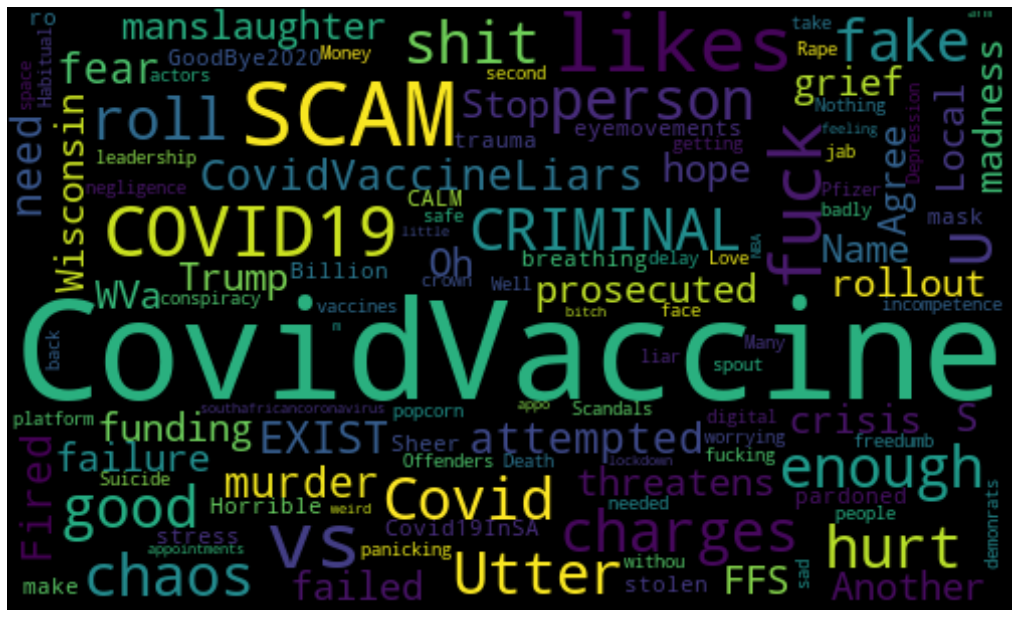

In [35]:
# Word cloud visualization

df_neg = df[df['sentiment']=='negative']

from wordcloud import WordCloud

allWords = ' '.join([twts for twts in df_neg['text']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize = (18,18))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see negative words such as: Scam, fear, criminal, chaos, these are all expected outputs. 
<i> Note ignore the obscene language.</i>

<h4>Remove Hashtag text</h4>

We can see that our word cloud contains words such as covid, vaccine, vacine names, these are all hashtags text. Let's get rid of those to see if we get a better result.

In [31]:
df_no_tags = pd.read_csv('tweets-covid.csv')
df_no_tags.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Kat 💚🖤 Black lives still matter.,"Indianapolis, IN","She/her. Proud mama, clinical research nurse, ...",25-05-16 20:36,6033,1418,61470,False,26-12-20 22:40,So I had one last dissolvable suture knot in m...,['COVIDvaccine'],Twitter for iPhone,False
1,Thomas Curran,Behind you..... ☺,Proud member of Jackie's Army.\n\nThese though...,26-06-12 18:43,871,1336,8858,False,26-12-20 22:36,Reason for the delay in #CovidVaccine rollout ...,['CovidVaccine'],Twitter for Android,False
2,ACCESS POINT HEALTH - POINT D'ACCÈS SANTÉ,Fredericton,Bilingual Secure Virtual Care for all of New B...,22-10-20 0:24,12,49,50,False,26-12-20 22:35,Info sur le 💉 mRNA/ARNm https://t.co/Xhftr53vC...,"['mRNA', 'covid', 'covidvaccine', 'nursepracti...",Twitter Web App,False
3,Tim Walker,London,A point of view mandrake@theneweuropean.co.uk,27-07-09 14:07,83877,998,14409,True,26-12-20 22:35,Sunday Mirror right to highlight this: I’m hea...,NaN,Twitter for iPhone,False
4,Judy Guzman-Cottrill,"Portland, OR",Pediatric Infectious disease physician with on...,28-04-09 20:05,1643,1467,7620,False,26-12-20 22:35,Guess which HCP got her #CovidVaccine today? T...,"['CovidVaccine', 'NotThrowingAwayMyShot', 'Bes...",Twitter for iPhone,False


In [32]:
def remove_hashtags(tags,text):
    string  =  text.split()
    temporal = text.split()
    
    # Remove link 
    for word in string:
        if "http" in word or "@" in word:
            temporal.remove(word)
            
    text = " ".join(temporal)
    
    #Remove Tags
    try:
        tags = ast.literal_eval(tags)
        for tag in tags:
            if tag in text:
                remove = "#"+tag
                text = text.replace(remove,"") 
                
    except:
        pass
    
    return text.strip()

In [33]:
#Remove the hashtag text out of the text
for i in range(len(df_no_tags['text'])):
    tags =  df_no_tags.loc[i,'hashtags']
    text =  df_no_tags.loc[i,'text']
    df_no_tags.loc[i,"text"] = remove_hashtags(tags,text)

In [34]:
df_no_tags[['text','hashtags']]

,text,hashtags
0,So I had one last dissolvable suture knot in m...,['COVIDvaccine']
1,Reason for the delay in rollout revealed as i...,['CovidVaccine']
2,Info sur le 💉 mRNA/ARNm via vaccine …,"['mRNA', 'covid', 'covidvaccine', 'nursepracti..."
3,Sunday Mirror right to highlight this: I’m hea...,NaN
4,Guess which HCP got her today? THIS ONE,"['CovidVaccine', 'NotThrowingAwayMyShot', 'Bes..."
...,...,...
6625,How China CDC head Dr. George Gao comment : - ...,['CovidVaccine']
6626,Why doesn’t Santa Rosa Department of Health ha...,NaN
6627,What a good news to wake up to today😊.,"['oxfordvaccine', 'oxfordastrazeneca', 'CovidV..."
6628,And very kind of to follow me. (My only claim ...,NaN


In [35]:
#Drop rows that meet the condition
df_no_tags.drop(df_no_tags[df_no_tags.text == ''].index, inplace=True)
df_no_tags.reset_index(inplace=True)

Adding the score and sentiment column to the new dataframe

In [36]:
#User the same function as before

df_no_tags['score'] = None
df_no_tags['sentiment'] = None

list_scores, list_sentiment = [],[]

for i in range( len(df_no_tags['text'])):
    text =  df_no_tags.loc[i,'text']
    data = sentiment_analyzer_scores(text)
    list_scores.append(data[0])
    list_sentiment.append(data[1])

df_no_tags['score'] = list_scores
df_no_tags['sentiment'] =list_sentiment

Positive Word Cloud - New

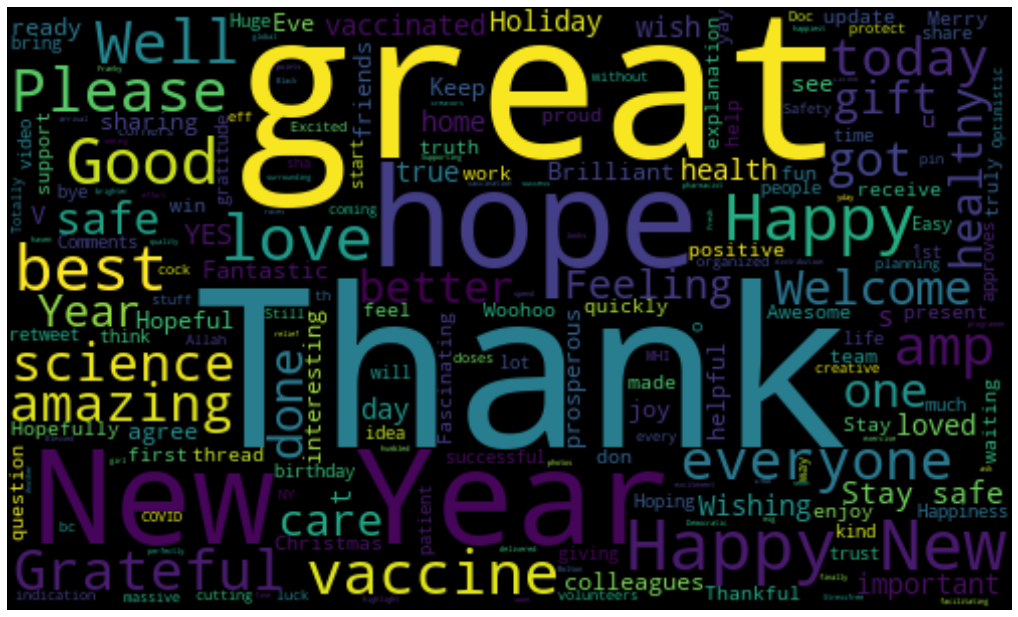

In [37]:
# Word cloud visualization

df_pos_no_tags = df_no_tags[df_no_tags['sentiment']=='positive']

from wordcloud import WordCloud

allWords = ' '.join([twts for twts in df_pos_no_tags['text']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize = (18,18))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We now see that the positive word looks better than before.

Negative Word Cloud - New

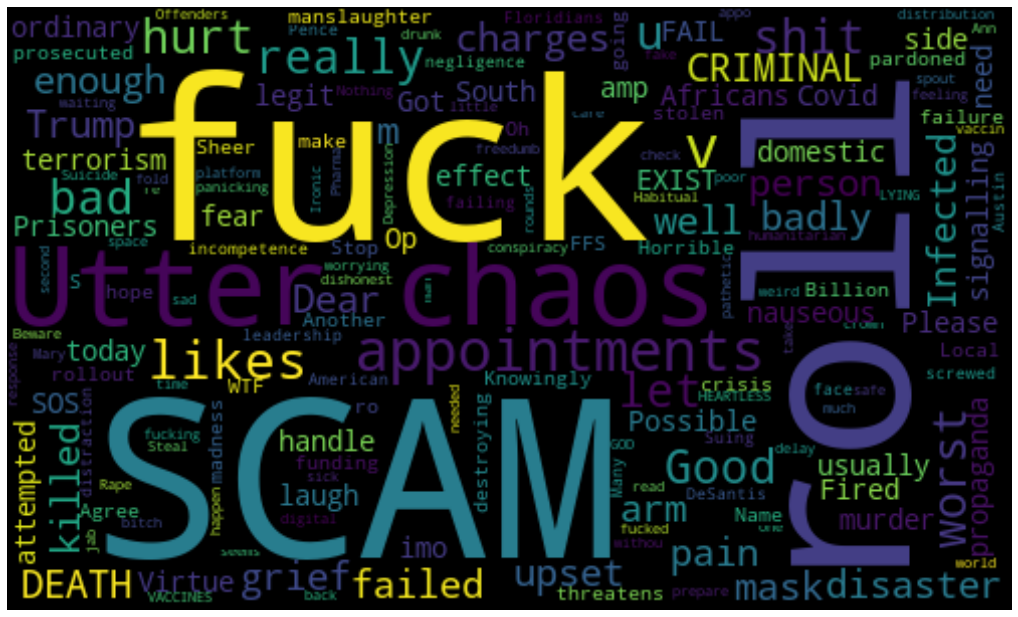

In [38]:
# Word cloud visualization

df_neg_no_tags = df_no_tags[df_no_tags['sentiment']=='negative']

from wordcloud import WordCloud

allWords = ' '.join([twts for twts in df_neg_no_tags['text']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize = (18,18))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The same occurs for our negative cloud.
<br>Note please ignore the obscene language.

<h4>Adjusting Neutral Score Threshold</h4>

The amount of tweets with a sentiment of positive and negative is too small in comparison to the dataset.
Let's try to fix this by decreasing the amount of neutral comments. This will be done by establishing a new threshold.
We will test neutral comments with differente scores and decrease the threshold until we identify one that we can work with

In [39]:
threshold = 0.6

In [40]:
df_user_neu_filter = df_no_tags.loc[ (df_no_tags['score'] < threshold) & (df_no_tags['score'] > 0) ].reset_index()

print(len(df_user_neu_filter))

683


In [41]:
for i in range(50):
    print( sentiment_analyzer_scores( df_user_neu_filter.loc[i,'text']),
        "->", df_user_neu_filter.loc[i,'text']
       )
    
    print("\n")

[0.576, 'neutral'] -> The vaccines are effective against the U.K strain; it’s more contagious, but not more severe.


[0.566, 'neutral'] -> please update public on


[0.515, 'neutral'] -> In all seriousness I feel extremely lucky to get the  and perfectly fine. I hope it’s rolled out soon…


[0.576, 'neutral'] -> Just got my  ! Feeling great so far 🐺


[0.506, 'neutral'] -> Yes keep highlighting the positives and many people will start ignoring restrictions…


[0.478, 'positive'] -> How we got  so quickly without cutting corners? Good planning Good science Good luck


[0.556, 'neutral'] -> Yassss I did the damn thing! 🖤🤞💉


[0.411, 'neutral'] -> A surprise Christmas gift! A weirdly emotional end to a bizarre and horrible year. 💉💪✨  …


[0.588, 'neutral'] -> One of the best explanations of mRNA


[0.479, 'negative'] -> Got my  today &amp; my arm hurts SO bad, I’m legit nauseous from the pain. And I handle pain really well usually. 😞😭 SOS!!! 🦠


[0.55, 'neutral'] -> 6 days after  and tex

0.60 seems OK, the comment tend to have either a slightly positive or negative meaning that we can work with.

<h4>Adjusting Neutral Values</h4>

We are going to change the sentiment and the score in those rows that we can reaclassify

In [42]:
def sentiment_analyzer_fixed_scores(sentence):
    score = analyser.polarity_scores(sentence)

    if score['neu'] > threshold or score['neg'] == score['pos']:
        return [score['neu'],"neutral"] 

    elif score['pos'] > score['neg']:
        return [score['pos'],"positive"]

    elif  score['neg'] > score['pos']:
        return [score['neg'],"negative"]

In [43]:
df_no_tags['sentiment'] = None
df_no_tags['score'] = None

list_sentiment,list_scores = [],[]

for i in range( len(df_no_tags['text']) ):
    text =  df_no_tags.loc[i,'text']
    data = sentiment_analyzer_fixed_scores(text)
    
    list_scores.append(data[0])
    list_sentiment.append(data[1])

df_no_tags['score'] = list_scores
df_no_tags['sentiment'] =list_sentiment

In [44]:
df_no_tags.sentiment.value_counts()

neutral     5833
positive     542
negative     231
Name: sentiment, dtype: int64

We can see that our numbers are higher, but not as significant as we would've hoped for.

Let's visualize these new results

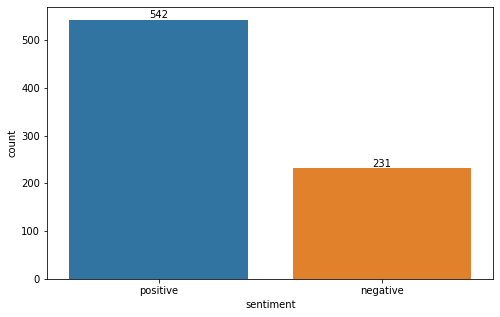

In [45]:
df_sentiment = df_no_tags[df_no_tags['sentiment']!='neutral']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment',data=df_sentiment)

for p in ax.patches:
    ax.annotate(   p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points'
                )    
plt.show()

<h4>Word Cloud</h4>

Positive

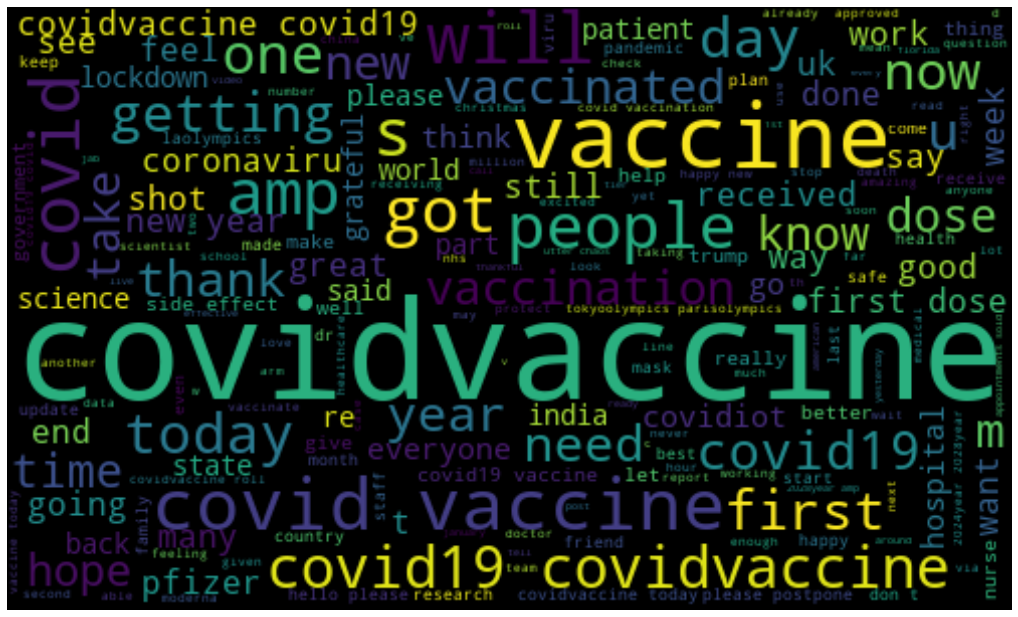

In [46]:
# Word cloud visualization

df_pos = df_no_tags[df_no_tags['sentiment']=='positive']

from wordcloud import WordCloud

allWords = ' '.join([twts for twts in df['text']]).lower()


wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize = (18,18))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Negative

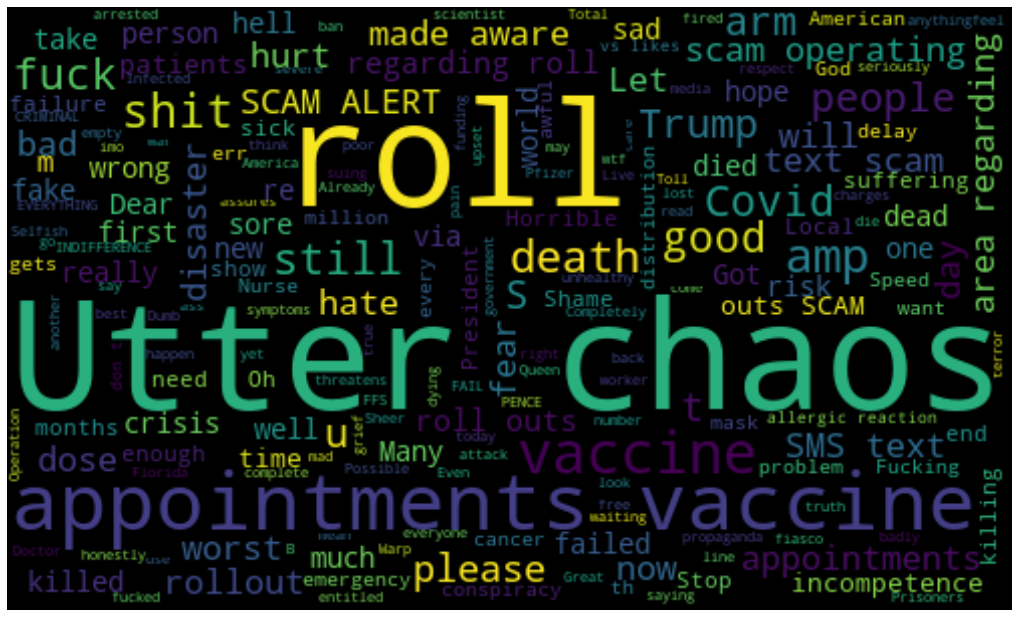

In [47]:
# Word cloud visualization

df_neg = df_no_tags[df_no_tags['sentiment']=='negative']

from wordcloud import WordCloud

allWords = ' '.join([twts for twts in df_neg['text']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize = (18,18))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3>Final Thoughts</h3>

We don't have enough evidence to understand if the general public has a positive or negative viewpoint regarding the current covid words.

People seems to have more of a  mixed-neutral feelings towards the vaccines, lockdowns and overall pandemic situation.